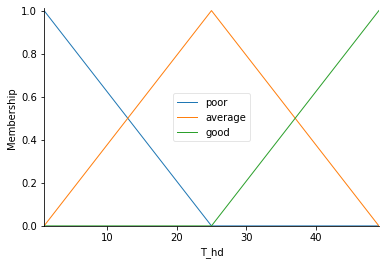

In [6]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

input_freq=ctrl.Antecedent(np.arange(1,1000),'input_freq')#taking input
#creating membership function
input_freq['poor']=fuzzy.trimf(input_freq.universe,[0,0,300])
input_freq['average']=fuzzy.trimf(input_freq.universe,[0,300,650])
input_freq['good']=fuzzy.trimf(input_freq.universe,[0,650,1000])

#taking total range of total harmonic distortion
T_hd=ctrl.Consequent(np.arange(1,50,1),'T_hd')
T_hd.automf(3)
T_hd.view()
plt.show()


In [7]:
pip install scikit-fuzzy

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f12b4c78e48>)

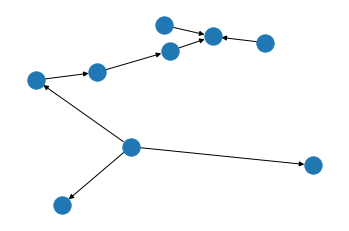

In [8]:
rule1 = ctrl.Rule(input_freq['poor'] , T_hd['good'])
rule2 = ctrl.Rule(input_freq['average'], T_hd['average'])
rule3 = ctrl.Rule(input_freq['good'], T_hd['poor'])

rule1.view()

20.04149128651051


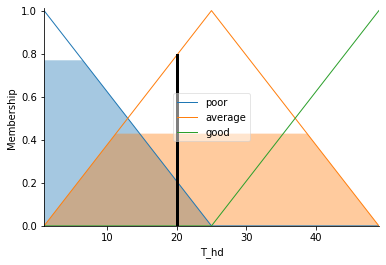

In [10]:
t_hd_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
t_hd = ctrl.ControlSystemSimulation(t_hd_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
t_hd.input['input_freq'] =500


# Crunch the numbers
t_hd.compute()

print (t_hd.output['T_hd'])
T_hd.view(sim=t_hd)